YoloV4 Detection Example
===

What does this notebook do?
1. Install `tf2_yolov4` with pip.
2. Download weights from darknet YoloV4 trained on COCO and convert them to tensorflow weights.
3. Instanciate YoloV4 model, load COCO weights and run prediction on a single image.

## 1. Install `tf2_yolov4` + TensorFlow

In [1]:
!pip install --no-cache-dir https://github.com/sicara/tf2-yolov4/archive/master.zip
!pip install tensorflow==2.2.0

     | 3.5MB 1.2MB/s
  Created wheel for tf2-yolov4: filename=tf2_yolov4-0.1.0-cp36-none-any.whl size=20144 sha256=ad56ad8ab43e2b34f288cfcc68f74af016cd40a4c5e0cfc0af99035be13112d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-j87sh6qc/wheels/dd/5a/79/53f47cadc4652a9a54ebe232fe724de8fdb8700e3a0c99bf9c
Successfully built tf2-yolov4


## 2. Get COCO pretrained weights

First, download `yolov4.weights` from [AlexeyAB/darknet](https://github.com/AlexeyAB/darknet#how-to-evaluate-ap-of-yolov4-on-the-ms-coco-evaluation-server) repository.
The `yolov4.weights` file length should be `257717640`. If not, rerun the cell.

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT" -O yolov4.weights
!rm -rf /tmp/cookies.txt
!ls -la ./yolov4.weights

--2020-12-06 18:16:34--  https://docs.google.com/uc?export=download&confirm=5CO7&id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
Resolving docs.google.com (docs.google.com)... 74.125.204.101, 74.125.204.100, 74.125.204.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-c4-docs.googleusercontent.com/docs/securesc/uopcdfgmp7id632gm9epkcknk5duv4nf/jagokb72dcf3h8ku6tl1qsig1g4uj8jq/1607278575000/14889149095783116612/05595146042070731798Z/1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT?e=download [following]
--2020-12-06 18:16:35--  https://doc-14-c4-docs.googleusercontent.com/docs/securesc/uopcdfgmp7id632gm9epkcknk5duv4nf/jagokb72dcf3h8ku6tl1qsig1g4uj8jq/1607278575000/14889149095783116612/05595146042070731798Z/1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT?e=download
Resolving doc-14-c4-docs.googleusercontent.com (doc-14-c4-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting 

`tf2_yolov4` provides a `convert-darknet-weights`, a script to convert a darknet weights file (*.weights) to a tensorflow weights file (*.h5):

In [3]:
!convert-darknet-weights yolov4.weights -o yolov4.h5
!ls -la ./yolov4.h5

2020-12-06 18:16:42.135118: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-12-06 18:16:42.144498: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-12-06 18:16:42.144585: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (eae51a08505b): /proc/driver/nvidia/version does not exist
2020-12-06 18:16:42.144944: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-12-06 18:16:42.151027: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2200000000 Hz
2020-12-06 18:16:42.151393: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2b52a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-12-06 18:16

## 3. Run a prediction

Import tensorflow, tf2_yolov4 model and anchors

In [4]:
import tensorflow as tf

from tf2_yolov4.anchors import YOLOV4_ANCHORS
from tf2_yolov4.model import YOLOv4

HEIGHT, WIDTH = (640, 960)

Download an image:

--2020-12-06 18:16:59--  https://github.com/sicara/tf2-yolov4/raw/master/notebooks/images/cars.jpg
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sicara/tf2-yolov4/master/notebooks/images/cars.jpg [following]
--2020-12-06 18:17:00--  https://raw.githubusercontent.com/sicara/tf2-yolov4/master/notebooks/images/cars.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197210 (193K) [image/jpeg]
Saving to: ‘cars.jpg.1’

cars.jpg.1          100%[===================>] 192.59K  --.-KB/s    in 0.03s   

2020-12-06 18:17:00 (6.35 MB/s) - ‘cars.jpg.1’ saved [197210/197210]



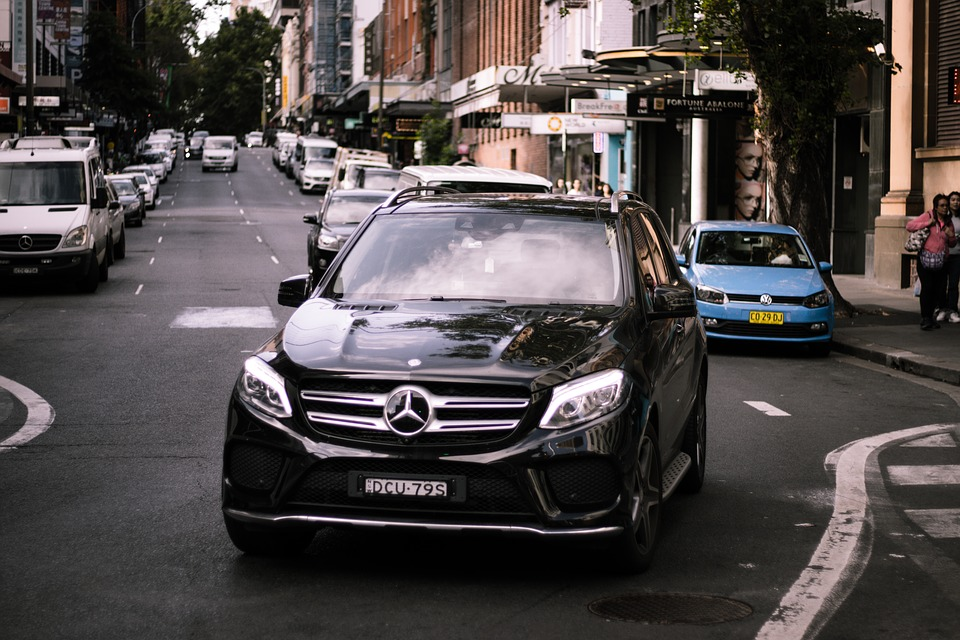

In [5]:
!wget https://github.com/sicara/tf2-yolov4/raw/master/notebooks/images/cars.jpg

from IPython.display import Image
Image('./cars.jpg')

Open and preprocess the image with TensorFlow:

In [6]:
image = tf.io.read_file("./cars.jpg")
image = tf.image.decode_image(image)
image = tf.image.resize(image, (HEIGHT, WIDTH))
images = tf.expand_dims(image, axis=0) / 255.0

Create YoloV4 model and load COCO weights:

In [7]:
model = YOLOv4(
    input_shape=(HEIGHT, WIDTH, 3),
    anchors=YOLOV4_ANCHORS,
    num_classes=80,
    training=False,
    yolo_max_boxes=100,
    yolo_iou_threshold=0.5,
    yolo_score_threshold=0.5,
)

model.load_weights("./yolov4.h5")
model.summary()

/usr/local/lib/python3.6/dist-packages/tensorflow_addons/options.py:47: RuntimeWarning: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_addons/activations/mish.py", line 44, in mish
    return _mish_custom_op(x)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_addons/activations/mish.py", line 59, in _mish_custom_op
    return _activation_so.ops.addons_mish(x)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_addons/utils/resource_loader.py", line 64, in ops
    self._ops = tf.load_op_library(get_path_to_datafile(self.relative_path))
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/load_library.py", line 58, in load_op_library
    lib_handle = py_tf.TF_LoadLibrary(library_filename)
tensorflow.python.framework.errors_impl.NotFoundError: /usr/local/lib/python3.6/dist-packages/tensorflow_addons/custom_ops/activations/_activation_ops.so: undefined symbol: _ZN10tensorflow20OpKernelConstruction14MatchSign

Model: "YOLOv4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 640, 960, 3) 0                                            
__________________________________________________________________________________________________
CSPDarknet53 (Model)            [(None, 80, 120, 256 26652512    input_8[0][0]                    
__________________________________________________________________________________________________
YOLOv4_neck (Model)             [(None, 80, 120, 128 15857152    CSPDarknet53[1][0]               
                                                                 CSPDarknet53[1][1]               
                                                                 CSPDarknet53[1][2]               
_____________________________________________________________________________________________

Predict:

In [8]:
boxes, scores, classes, valid_detections = model.predict(images)

Draw the output bounding boxes:

In [9]:
# COCO classes
CLASSES = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

In [10]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

def plot_results(pil_img, boxes, scores, classes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()

    for (xmin, ymin, xmax, ymax), score, cl in zip(boxes.tolist(), scores.tolist(), classes.tolist()):
        if score > 0:
          ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                    fill=False, color=COLORS[cl % 6], linewidth=3))
          text = f'{CLASSES[cl]}: {score:0.2f}'
          ax.text(xmin, ymin, text, fontsize=15,
                  bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [11]:
plot_results(
    images[0],
    boxes[0] * [WIDTH, HEIGHT, WIDTH, HEIGHT],
    scores[0],
    classes[0].astype(int),
)

Output hidden; open in https://colab.research.google.com to view.